In [94]:
import pandas as pd
from io import StringIO
from sklearn.preprocessing import Imputer #插值
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from math import pow
from sklearn.base import clone
from itertools import combinations
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

## 缺失数据的处理

### 直接删除缺失数据

In [2]:
csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,7.0,8.0
0.0,11.0,12.0,'''
#if you are using python2.7,you need to convert the string to unicode:csv_data = unicode(csv_data)
csv_data = unicode(csv_data)
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0
2,0.0,11.0,12.0,NaN


In [3]:
#查看数据中每一列包含多少缺失数据
df.isnull().sum()

A    0
B    0
C    0
D    1
dtype: int64

输出显示D列有一个数据缺失

In [4]:
#把所有含有缺失数据的行删除
df.dropna()

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0


In [6]:
#把所有含有缺失数据的列删除
df.dropna(axis=1)

,A,B,C
0,1.0,2.0,3.0
1,5.0,6.0,7.0
2,0.0,11.0,12.0


In [7]:
#删除所有特征值都为null的行
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0
2,0.0,11.0,12.0,NaN


In [8]:
#删除所有特征值都为null的行
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0
2,0.0,11.0,12.0,NaN


In [9]:
#只删掉那些在指定列上的特征值为NULL的行
df.dropna(subset=['D'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0


### 进行数据填充

In [12]:
imr = Imputer(missing_values='NaN', strategy='mean')#使用均值填充缺失值
imr = imr.fit(df)
imputed_data = imr.transform(df.values)
imputed_data

array([[  1.,   2.,   3.,   4.],
       [  5.,   6.,   7.,   8.],
       [  0.,  11.,  12.,   6.]])

In [14]:
imr = Imputer(missing_values='NaN', strategy='most_frequent') #使用众数填充缺失值
imr = imr.fit(df)
imputed_data = imr.transform(df.values)
imputed_data

array([[  1.,   2.,   3.,   4.],
       [  5.,   6.,   7.,   8.],
       [  0.,  11.,  12.,   4.]])

## 处理类别数据

In [16]:
df = pd.DataFrame([
    ['green','M',10.1,'class1'],
    ['red','L',13.5,'class2'],
    ['blue','XL',15.3,'class1']
])

In [17]:
df.columns = ['color','size','price','classlabel']

In [18]:
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


### 有序特征的映射

In [19]:
size_mapping = {
    'XL':3,
    'L':2,
    'M':1
}

In [20]:
#使用map方法来进行元素映射
df['size'] = df['size'].map(size_mapping)

In [21]:
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


### 类标的编码

In [23]:
#使用类似于有序特征映射的方式
class_mapping = {label:idx for idx,label in enumerate(np.unique(df['classlabel']))}

In [24]:
class_mapping

{'class1': 0, 'class2': 1}

In [25]:
df['classlabel'] = df['classlabel'].map(class_mapping)

In [26]:
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


### 使用sklearn中的LabelEncoder可以更加高效的完成类标的编码工作

In [28]:
class_le = LabelEncoder()

In [30]:
y = class_le.fit_transform(df['classlabel'].values)

In [31]:
y

array([0, 1, 0])

## 标称特征熵的独热编码

In [49]:
pd.get_dummies(df)

,size,price,classlabel,color_blue,color_green,color_red
0,1,10.1,0,0,1,0
1,2,13.5,1,0,0,1
2,3,15.3,0,1,0,0


# 将数据集划分为训练数据集和测试数据集

In [50]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)

In [51]:
df_wine.columns = ['Class label','Alcohol','Malic acid',
                  'Ash','Alcalinity of ash','Magnesium','Total phenols',
                  'Flavanoids','NonFlavanoid phenols','Proanthocyanins',
                  'Color intensity','Hue',
                  'OD280/OD315 of diluted wines',
                  'Proline']

In [52]:
print('Class labels', np.unique(df_wine['Class label']))

('Class labels', array([1, 2, 3]))


In [53]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,NonFlavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [59]:
X,y = df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

## 特征缩放

## 归一缩放

In [61]:
mms = MinMaxScaler()

In [62]:
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

## 标准缩放

In [64]:
stdsc = StandardScaler()

In [65]:
X_train_std = stdsc.fit_transform(X_train)
X_test_std =stdsc.transform(X_test)

## 特征选择

In [67]:
#在逻辑斯蒂回归模型中使用L1正则化
LogisticRegression(penalty='l1')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [68]:
#将模型应用到葡萄酒数据集上
lr = LogisticRegression(penalty='l1',C=0.1)

In [69]:
lr.fit(X_train_std, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [70]:
print('Training accuracy:', lr.score(X_train_std, y_train))

('Training accuracy:', 0.9838709677419355)


In [71]:
print('Test accuracy:', lr.score(X_test_std, y_test))

('Test accuracy:', 0.98148148148148151)


结果显示，训练和测试的精确度均为98%，显示此模型未出现过拟合

In [72]:
#输出模型的截距项
lr.intercept_

array([-0.38387224, -0.15808716, -0.70045494])

In [73]:
#输出模型的权重数组
lr.coef_

array([[ 0.28025276,  0.        ,  0.        , -0.02790594,  0.        ,
         0.        ,  0.71027583,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.23605176],
       [-0.64397377, -0.06876897, -0.05721226,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.92683084,
         0.06020639,  0.        , -0.3710024 ],
       [ 0.        ,  0.06145666,  0.        ,  0.        ,  0.        ,
         0.        , -0.63564633,  0.        ,  0.        ,  0.49790937,
        -0.35836809, -0.57151949,  0.        ]])

LR模型使用OvR方法来进行多分类。通过观察输出的权重数组，可以发现权重向量是稀疏的。也就是说，在L1正则化特征选择的作用下，我们训练了一个模型，该模型对数据集上可能存在的不相关特征是鲁棒的。

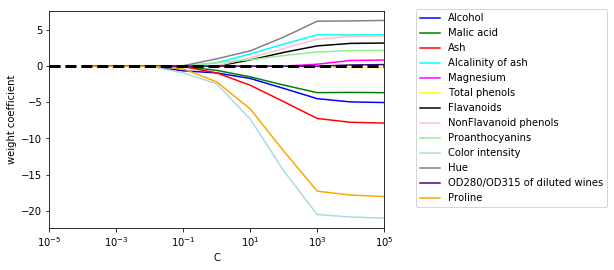

In [78]:
#探讨正则化系数对权重系数的影响
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue','green','red','cyan','magenta','yellow','black',
         'pink','lightgreen','lightblue','gray','indigo','orange']
weights,params = [],[]
for c in np.arange(-4, 6):
    lr = LogisticRegression(penalty='l1',C=pow(10,c), random_state=0)
    lr.fit(X_train_std,y_train)
    weights.append(lr.coef_[1])
    params.append(pow(10,c))
weights = np.array(weights)
for column,color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:,column],label=df_wine.columns[column+1],color=color)
plt.axhline(0,color='black',linestyle='--',linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38,1.03),ncol=1,fancybox=True)
plt.show()

# 序列后向选择算法（用于特征选择）

In [81]:
class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score, test_size=0.25, random_state=1):
        """
        k_features:指定需返回的特征数量
        accuracy_score衡量分类器的模型和评估器在特征空间熵的性能
        """
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)
        #维度，也是特征的个数
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []
            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])

        self.k_score_ = self.scores_[-1]

        return self


    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [83]:
#在sklearn的knn分类器中应用SBS
knn = KNeighborsClassifier(n_neighbors=2)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std,y_train)

<__main__.SBS instance at 0x7f21656279e0>

In [84]:
k_feat = [len(k) for k in sbs.subsets_]

In [85]:
k_feat

[13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

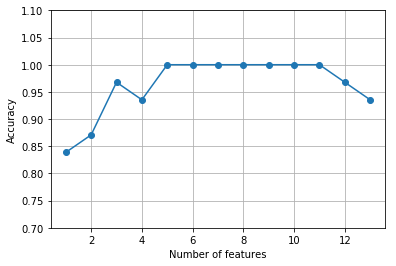

In [86]:
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7,1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

上图显示，特征的数量减少后，KNN分类器在验证集上的准确率提高了。而且在保留5个特征时，准确率达到最高点，后面随着维度增大，准确率并没有提高，反而出现下降的情况，所以，最好的特征数为5

In [87]:
#现在我们来看看哪5个特征在数据集上表现这么好
k5 = list(sbs.subsets_[8])

In [88]:
print(df_wine.columns[1:][k5])

Index([u'Alcohol', u'Malic acid', u'Alcalinity of ash', u'Hue', u'Proline'], dtype='object')


In [91]:
#验证knn分类器在原始测试集上的表现
knn.fit(X_train_std, y_train)
print('Training accuracy: ',knn.score(X_train_std, y_train))
print('Test accuracy: ',knn.score(X_test_std, y_test))

('Training accuracy: ', 0.9838709677419355)
('Test accuracy: ', 0.94444444444444442)


In [92]:
#使用SBS选择的特征进行模型训练
knn.fit(X_train_std[:,k5], y_train)
print('Training accuracy: ',knn.score(X_train_std[:,k5], y_train))
print('Test accuracy: ',knn.score(X_test_std[:,k5], y_test))

('Training accuracy: ', 0.95967741935483875)
('Test accuracy: ', 0.96296296296296291)


通过对比发现，使用SBS进行特征选择，使得训练集上的准确率和测试集上的准确率差别很小，说明过拟合现象得以缓解。

## 基于随机森林判定特征的重要性

In [96]:
feat_labels = df_wine.columns[1:]

In [97]:
forest = RandomForestClassifier(n_estimators=10000, random_state=0,n_jobs=-1)

In [98]:
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f+1,30,feat_labels[f],importances[indices[f]]))

 1) Alcohol                        0.182483
 2) Malic acid                     0.158610
 3) Ash                            0.150948
 4) Alcalinity of ash              0.131987
 5) Magnesium                      0.106589
 6) Total phenols                  0.078243
 7) Flavanoids                     0.060718
 8) NonFlavanoid phenols           0.032033
 9) Proanthocyanins                0.025400
10) Color intensity                0.022351
11) Hue                            0.022078
12) OD280/OD315 of diluted wines   0.014645
13) Proline                        0.013916


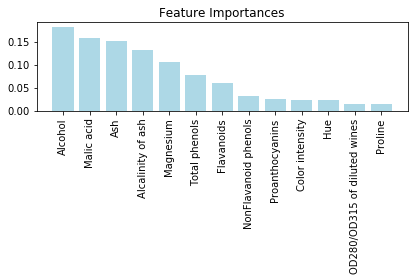

In [101]:
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),importances[indices],color='lightblue',align='center')
plt.xticks(range(X_train.shape[1]),feat_labels,rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.show()

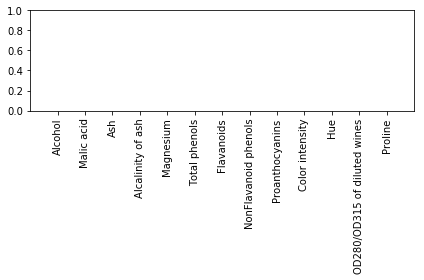

结论：基于10000颗决策树平均不纯度衰减的计算，数据集熵最具判别效果的特征是'alcohol'。有趣的是，上图中排名靠前的4个特征中有三个也出现在SBS算法选择的特征中。随机森林在特征选择上还有一个比SBS好的地方在于，它会筛掉那些高度相关的特征，使得只保留一个。

In [103]:
#将随机森林分类器作为特征选择器，并在设定阈值的基础上进行特征选择
X_selected =forest.transform(X_train, threshold=0.15)
X_selected.shape

/home/parallels/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


(124, 3)